# Определение возраста по фото

---

**Бизнес-задача**

Сетевой супермаркет внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:

- анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- контролировать добросовестность кассиров при продаже алкоголя.

---

**Входные данные**

Набор фотографий людей с указанием возраста (папка с изображениями и таблица).

---

**Цель**

Создать модель, которая по фотографии определит приблизительный возраст человека  
(цель указана в задании и, вероятно, не соотвествует бизнес-задаче).

---

**Задачи:**  

- выполнить исследовательский анализ данных;
- подготовить данные к обучению;
- обучить нейронную сеть и оценить ее качество;
- сформулировать рекомендации для дальнейшего развития проекта.

---

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Initial" data-toc-modified-id="Initial-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initial</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Constants" data-toc-modified-id="Constants-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Settings" data-toc-modified-id="Settings-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Settings</a></span></li></ul></li><li><span><a href="#Read-and-Check-data" data-toc-modified-id="Read-and-Check-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read and Check data</a></span><ul class="toc-item"><li><span><a href="#Labels" data-toc-modified-id="Labels-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Labels</a></span></li><li><span><a href="#Images" data-toc-modified-id="Images-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Images</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Model-train" data-toc-modified-id="Model-train-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Model train</a></span></li><li><span><a href="#Result-Visualisation" data-toc-modified-id="Result-Visualisation-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Result Visualisation</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span><ul class="toc-item"><li><span><a href="#Краткий-обзор-проделанной-работы" data-toc-modified-id="Краткий-обзор-проделанной-работы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Краткий обзор проделанной работы</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Исследовательский анализ</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Риски-и-рекомендации" data-toc-modified-id="Риски-и-рекомендации-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Риски и рекомендации</a></span></li></ul></li></ul></div>

---

## Intro

**Пояснения**

---

Постоянные таблицы с данными начинаются со слова **data** .  
Временные таблицы с данными начинаются со слова **df** .  

---

Код ячеек максимально независим друг от друга, чтобы свободно манипулировать ячейками.

---

Промежуточные выводы выделены так:

> Промежуточный вывод.

---

## Initial

### Imports

In [141]:
import pandas as pd
import numpy as np

import os
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

### Constants

In [142]:
# common constants

PATH_MAIN = 'datasets/faces/'                          # main path to dataset
PATH_IMAGES = PATH_MAIN + 'final_files/'               # path to images
CR = '\n'                                              # new line
RS = RANDOM_STATE = RANDOM_SEED = 888                  # random_state

In [143]:
# model

LOSS = 'mean_squared_error'                            # loss function
METRICS = ['mae']                                      # list of metrics
VALID_FRAC = 0.20                                      # delayed sampling fraction
IMG_SIDE = 192                                         # image side length in pixels for resize
TARGET_SIZE = (IMG_SIDE, IMG_SIDE)                     # resized image shape
INPUT_SHAPE = (IMG_SIDE, IMG_SIDE, 3)                  # input tensor shape
BATCH_SIZE = 16                                        # batch size
EPOCHS = 30                                            # maximum epoch's number
LEARNING_RATE = 0.0001                                 # initial learning rate

### Functions

In [144]:
def var_name(var):
    '''
    var name determination
    '''
    return [name for name in globals() if globals()[name] is var][0]

In [145]:
def basic_info(df: pd.DataFrame, sample_type='sample', samples=5, describe='all'):
    '''
    first info about dataframe: info(), sample()/head()/tail(), describe()
    '''
    
    # title (name of dataframe)
    
    print(f'\n\n {f.BOLD}{var_name(df)}{f.END}', '≋'*30)


    # method info()
    
    print('\n\n--- method info() ---\n')
    print(df.info())

    
    # several random records
    
    print(f'\n\n--- method {sample_type}({samples}) ---')
    
    if sample_type == 'sample':
        display(df.sample(samples))
    elif sample_type == 'head':
        display(df.head(samples))
    elif sample_type == 'tail':
        display(df.tail(samples))
    else:
        print(f'{sample_type} – invalid value for parameter "sample_type" ')
    
    
    # method describe()
    
    print(f'\n\n--- method describe({describe}) ---')
    
    if describe=='all' or describe=='numeric':
        try:
            display(df.describe(include=np.number))
        except ValueError:
            pass

    if describe=='all' or describe=='categorical':
        try:
            display(df.describe(exclude=np.number).T)
        except ValueError:
            pass
    
    if describe not in ['numeric','categorical','all']:
        print(f'{describe} – invalid value for parameter "describe" ')

### Settings

In [146]:
# text styles
class f:
    BOLD = "\033[1m"
    ITALIC = "\033[3m"
    END = "\033[0m"

In [147]:
# charts defaults

PLOT_DPI = 150  # dpi for charts rendering 
sns.set_style('whitegrid', {'axes.facecolor': '0.98', 'grid.color': '0.9', 'axes.edgecolor': '1.0'})
plt.rc(
       'axes',
       labelweight='bold',
       titlesize=16,
       titlepad=10,
      )

In [148]:
# Pandas defaults
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.colheader_justify = 'left'

In [149]:
# others
warnings.filterwarnings('ignore')

---

## Read and Check data

### Labels

In [150]:
data = pd.read_csv(PATH_MAIN + 'labels.csv')

In [151]:
basic_info(data)



 data ≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋


--- method info() ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7591 non-null   int64 
 1   file_name   7591 non-null   object
 2   real_age    7591 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 178.0+ KB
None


--- method sample(5) ---


Unnamed: 0 file_name    real_age
3268  3268        003268.jpg  22      
4339  4339        004339.jpg   1      
6920  6920        006931.jpg   1      
1236  1236        001236.jpg  18      
2266  2266        002266.jpg  40



--- method describe(all) ---


Unnamed: 0  real_age
count 7591.000    7591.000 
mean  3795.000      31.201 
std   2191.477      17.145 
min      0.000       1.000 
25%   1897.500      20.000 
50%   3795.000      29.000 
75%   5692.500      41.000 
max   7590.000     100.000

count unique top         freq
file_name  7591  7591   000000.jpg  1

Удаление поля со старым индексом.

In [152]:
data = data.drop('Unnamed: 0', axis=1)

> Дубликатов нет.  
> Пропусков нет.

### Images

In [153]:
check_flow = ImageDataGenerator(rescale=1/255).flow_from_dataframe(
        dataframe=data,
        directory=PATH_IMAGES,
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=RS,
        )

Found 7591 validated image filenames.


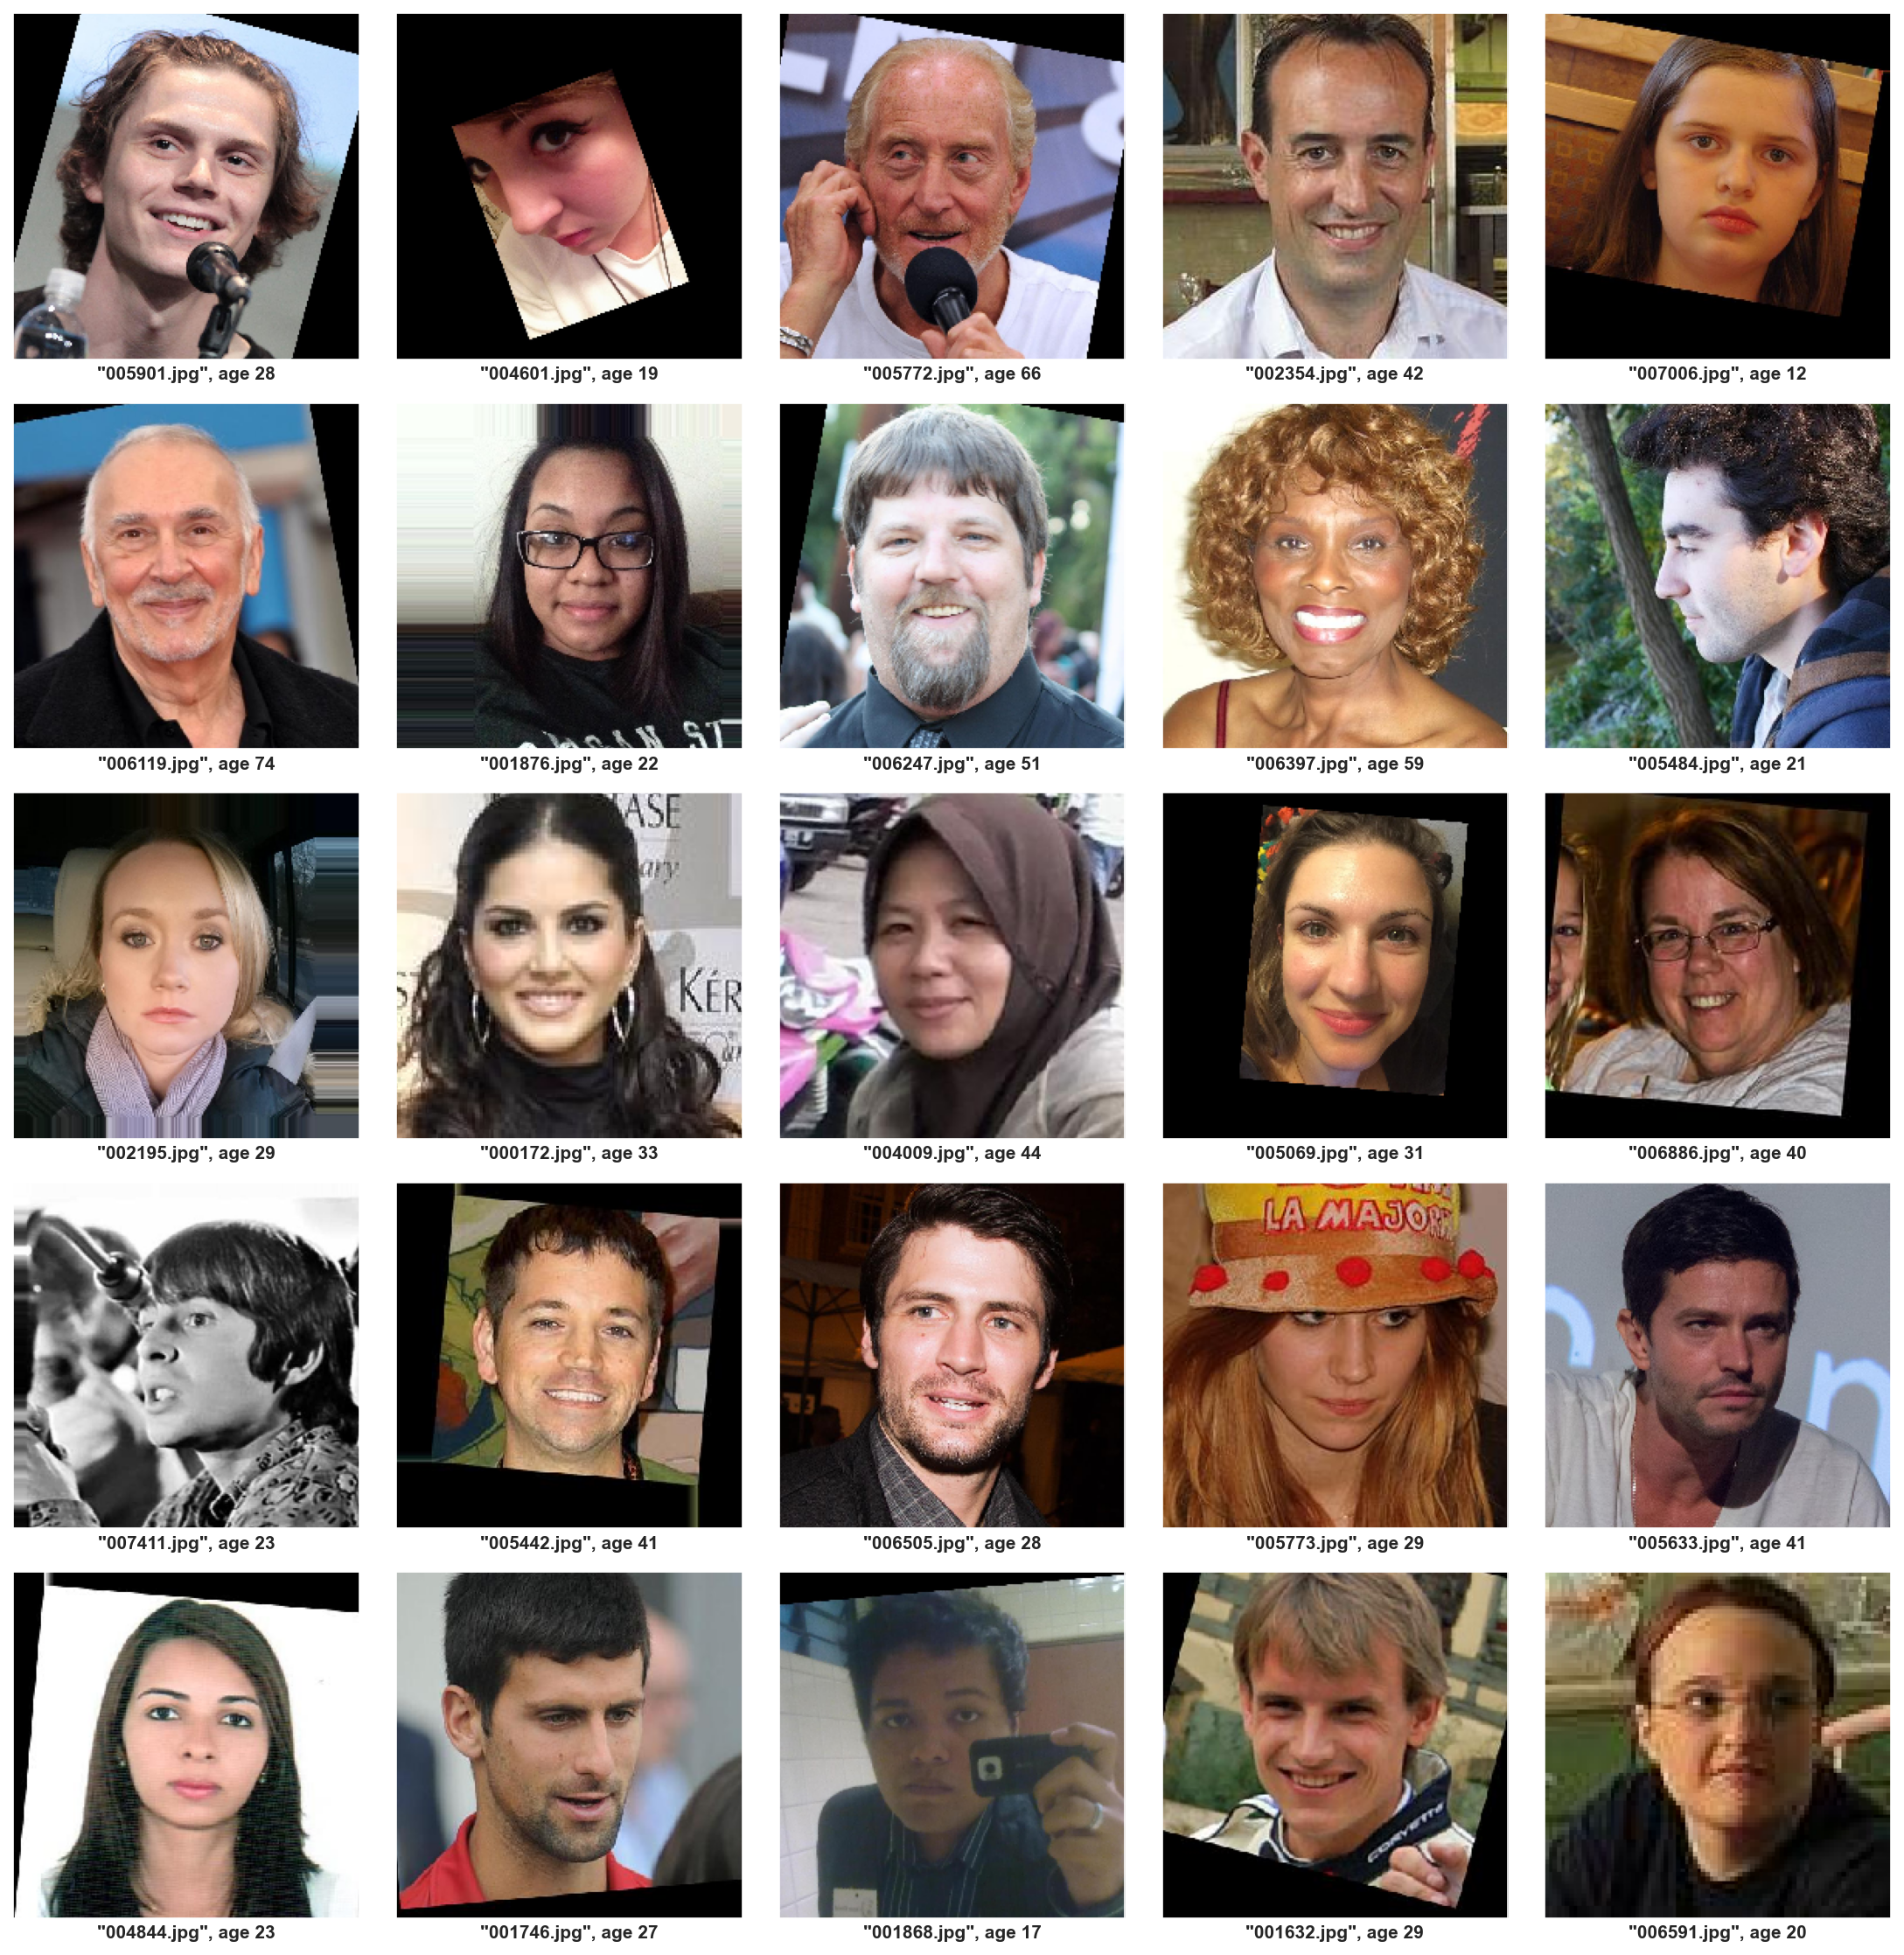

In [154]:
n_images = 25
n_rows = n_cols = int(n_images ** 0.5)

fig = plt.figure(figsize=(15,15), dpi=PLOT_DPI)
for i in range(n_images):
    fig.add_subplot(n_rows, n_cols, i+1) 
    plt.imshow(check_flow[0][0][i])                        # фото с индексом i из батча с номером 0
    plt.xlabel(f'"{check_flow.filenames[check_flow.index_array[i]]}", age {check_flow[0][1][i]}')
#     plt.xticks([])
#     plt.yticks([])
    plt.axis('off')
    plt.tight_layout()

> Изображения загружаются, возраст визуально соответствует.

> На некоторых фотографиях рядом с детским лицом частично присутствует лицо взрослого человека.

> Часть изображений подверглась изменению (вращению). Это может отрицательно сказаться при валидации.

---

## EDA

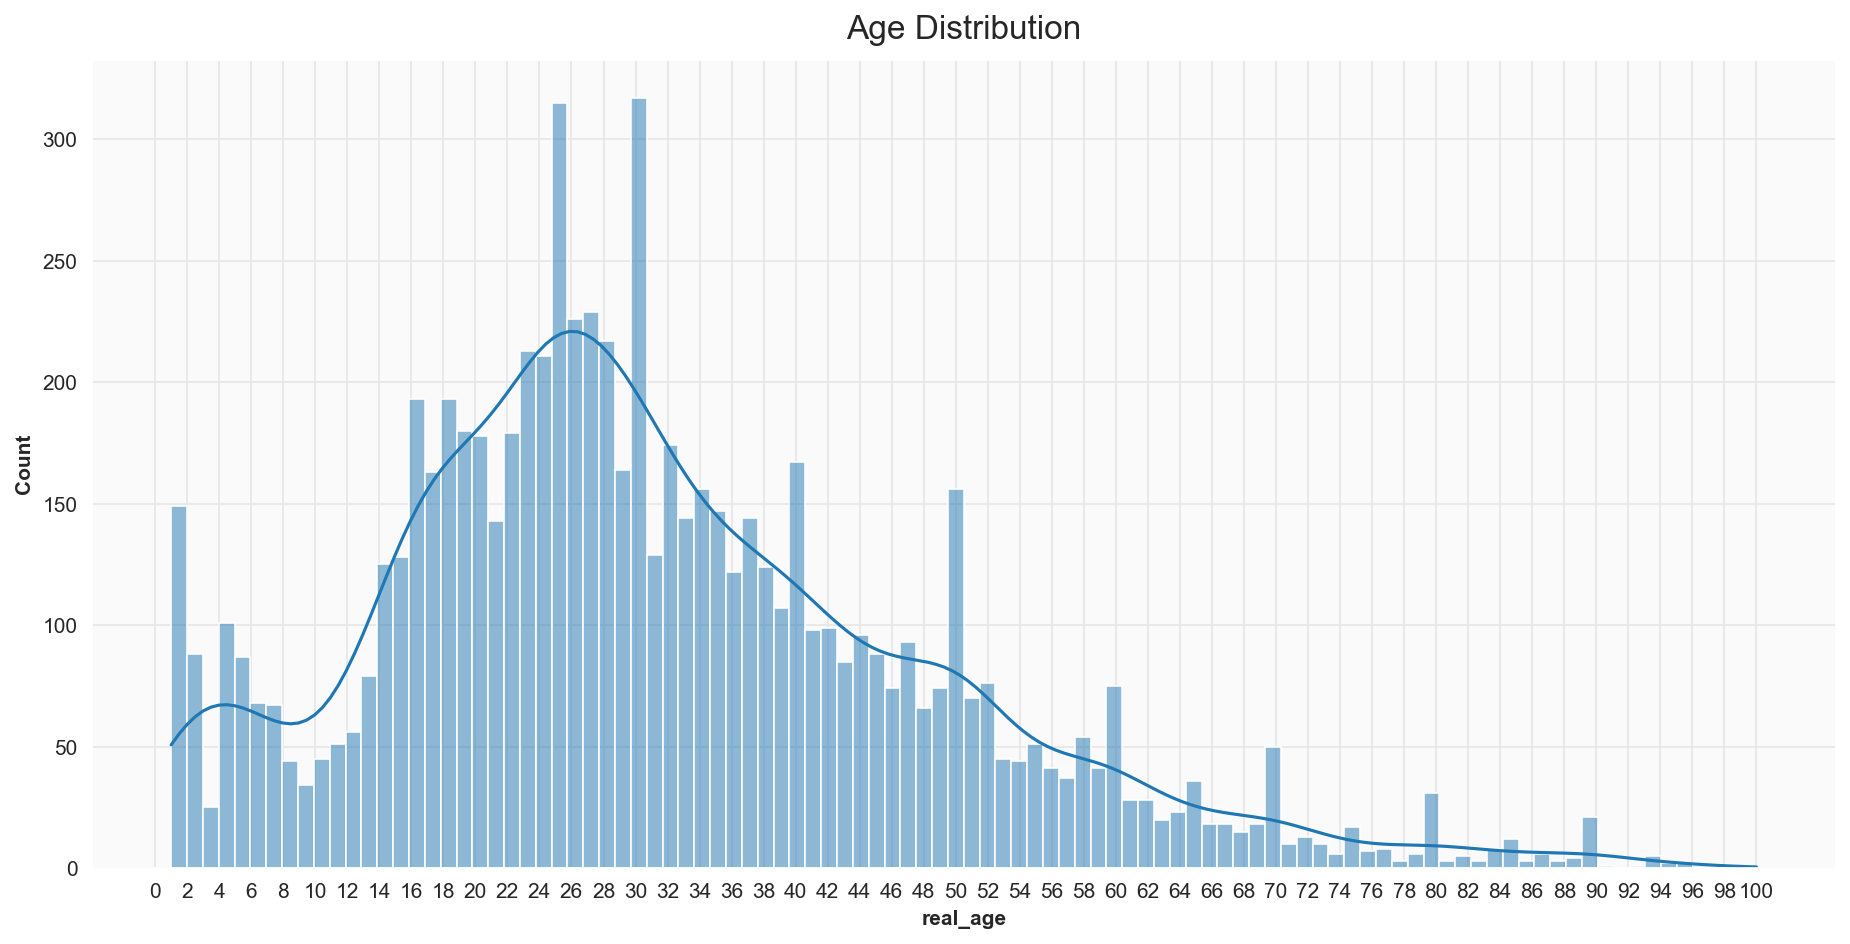

In [155]:
fig, ax = plt.subplots(figsize=(15,7), dpi=PLOT_DPI)
sns.histplot(x=data.real_age, bins=100, kde=True, palette='tab10')

ax.set_title('Age Distribution')
ax.set_xticks(range(0, data.real_age.max()+1, 2));

> На круглых датах — 25, 30, 40, 50, 60, 70, 80, 90 лет — наблюдаются пики.  
> Есть предположение, что при разметке данных в ряде случаев указан не точный возраст человека, а приблизительный. Это может отрицательно сказаться на качестве модели.

> В области примерно 8–14 лет наблюдается недостаток данных, по сравнению с соседними значениями. Этот дисбаланс может снизить качество модели.

> В целом распределение имеет длинный хвост справа, что может снизить точность прогноза в этой области, особенно с учетом предполагаемой проблемы с округлением возраста при разметке.

---

## Model

### Functions

In [156]:
def load_data(mode):
    '''
    Создает "генератор изображений" (изображения загружает из заданной папки).
    mode: "training" — создание обучающего набора,
          "validation" — создание валидационного набора,
    '''

    data = pd.read_csv(PATH_MAIN + 'labels.csv')

    if mode == 'training':
        data_gen = ImageDataGenerator(
                                      rescale=1/255,
                                      validation_split=VALID_FRAC,
                                    #   vertical_flip=True,
                                    #   horizontal_flip=True,
                                    #   zoom_range=[1, 2],
                                    #   channel_shift_range=10.0,
                                     )
    elif mode == 'validation':
        data_gen = ImageDataGenerator(
                                      rescale=1/255,
                                      validation_split=VALID_FRAC,
                                     )

    data_gen_flow = data_gen.flow_from_dataframe(
                                                 directory=PATH_IMAGES,
                                                 dataframe=data,
                                                 x_col='file_name',
                                                 y_col='real_age',
                                                 target_size=TARGET_SIZE,
                                                 batch_size=BATCH_SIZE,
                                                 subset=mode,
                                                 class_mode='raw',
                                                 seed=RS,
                                                )
    return data_gen_flow

> Проверены несколько вариантов аугментации. Без них результат лучше.

> Возник вопрос: **можно ли такой подход назвать аугментацией?** Насколько я  могу судить, создается один вариант трансформации взамен оригинала. Количество изображений при этом не увеличивается.

In [157]:
def create_model(input_shape):
    '''
    Создание модели на базе ResNet50.
    input_shape: форма входного тензора.
    '''

    backbone = ResNet50(
                        input_shape=input_shape,
                        weights='imagenet',
                        include_top=False,
                       )
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(loss=LOSS, optimizer=Adam(learning_rate=LEARNING_RATE), metrics=METRICS)

    return model

In [158]:
def train_model(model, data_train, data_test,
                batch_size=None, epochs=1,
                steps_train=None, steps_valid=None):

    if steps_train is None:
        steps_train = len(data_train)
    if steps_valid is None:
        steps_valid = len(data_test)

    model.fit(
              data_train,
              validation_data=data_test,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_train,
              validation_steps=steps_valid,
              verbose=2,
             )

    return model

### Model train

Параметры steps_train=1 и steps_valid=1 — для ускоренной отладки.

In [159]:
%%time

    model = train_model(
                        model=create_model(input_shape=INPUT_SHAPE),
                        data_train=load_data(mode='training'),
                        data_test=load_data(mode='validation'),
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
                        # steps_train=1,
                        # steps_valid=1,
                       )

Found 6073 validated image filenames.
Found 1518 validated image filenames.
Epoch 1/30
380/380 - 902s - loss: 226.9406 - mae: 10.9866 - val_loss: 501.0945 - val_mae: 17.2017 - 902s/epoch - 2s/step
Epoch 2/30
380/380 - 879s - loss: 79.1902 - mae: 6.8126 - val_loss: 128.6863 - val_mae: 8.5354 - 879s/epoch - 2s/step
Epoch 3/30
380/380 - 880s - loss: 47.9514 - mae: 5.3180 - val_loss: 84.2908 - val_mae: 6.8017 - 880s/epoch - 2s/step
Epoch 4/30
380/380 - 881s - loss: 30.8057 - mae: 4.2735 - val_loss: 73.2570 - val_mae: 6.3430 - 881s/epoch - 2s/step
Epoch 5/30
380/380 - 880s - loss: 21.7141 - mae: 3.6071 - val_loss: 72.3124 - val_mae: 6.3217 - 880s/epoch - 2s/step
Epoch 6/30
380/380 - 880s - loss: 17.0664 - mae: 3.1608 - val_loss: 68.9332 - val_mae: 6.2787 - 880s/epoch - 2s/step
Epoch 7/30
380/380 - 879s - loss: 17.3282 - mae: 3.1784 - val_loss: 74.9222 - val_mae: 6.5140 - 879s/epoch - 2s/step
Epoch 8/30
380/380 - 889s - loss: 14.0729 - mae: 2.8550 - val_loss: 70.7757 - val_mae: 6.2530 - 889s

### Result Visualisation

In [160]:
model_result = pd.DataFrame({
    'train_loss': model.history.history['loss'],
    'train_mae': model.history.history['mae'],
    'val_loss': model.history.history['val_loss'],
    'val_mae': model.history.history['val_mae']
})

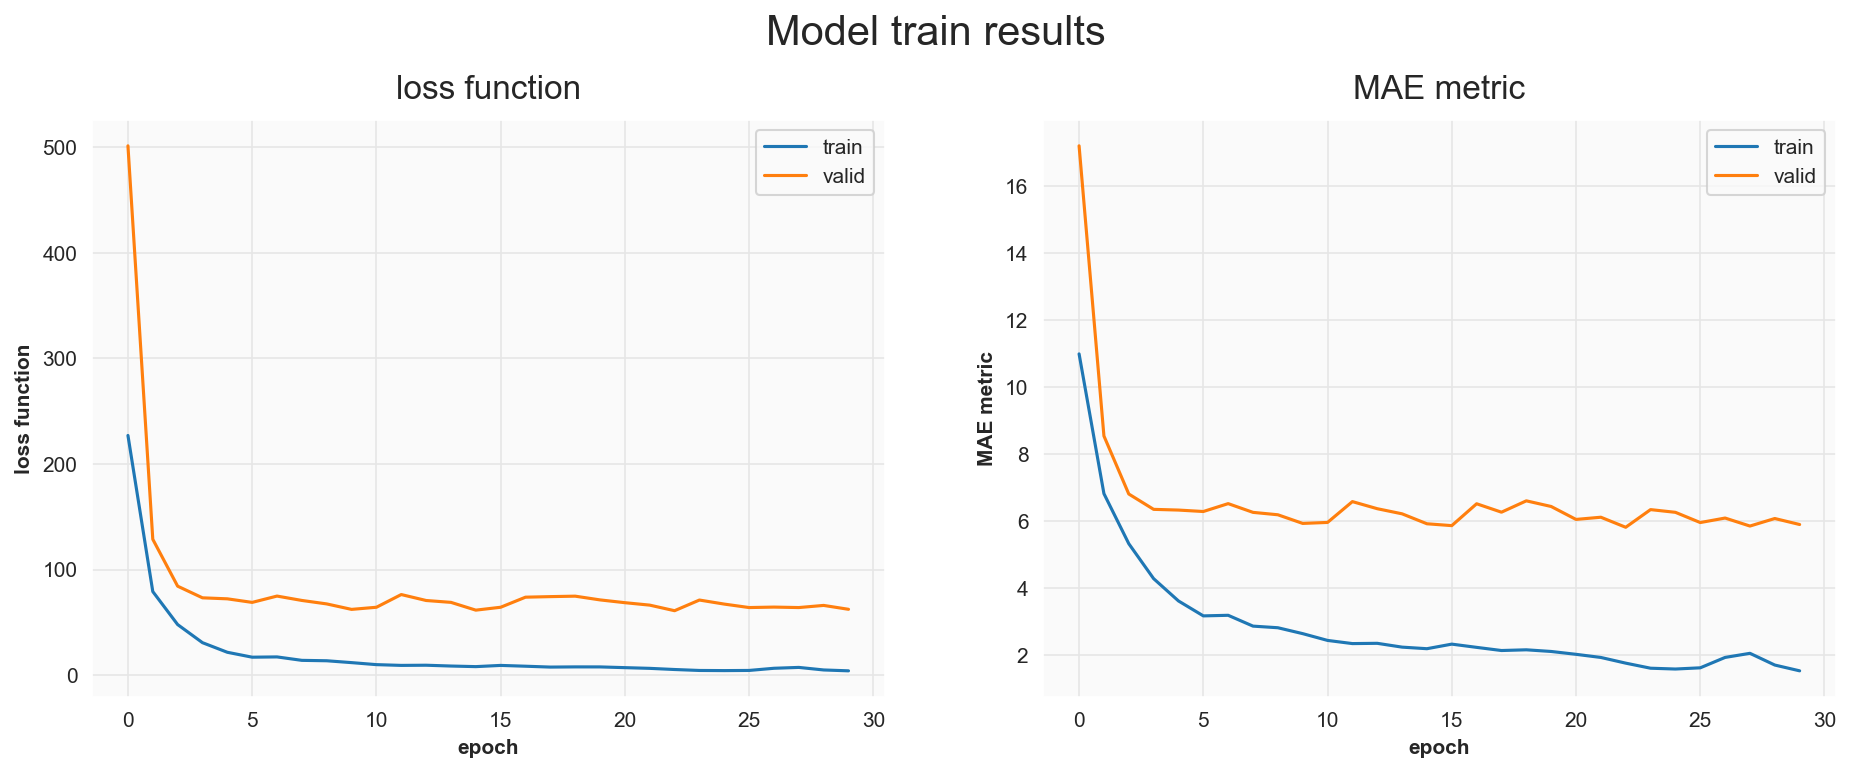

In [161]:
fig, ax = plt.subplots(figsize=(15,5), ncols=2, dpi=PLOT_DPI)
fig.suptitle('Model train results', fontsize=20, y=1.02)

sns.lineplot(x=range(EPOCHS), y=model_result.train_loss, ax=ax[0], label='train')
sns.lineplot(x=range(EPOCHS), y=model_result.val_loss, ax=ax[0], label='valid')

sns.lineplot(x=range(EPOCHS), y=model_result.train_mae, ax=ax[1], label='train')
sns.lineplot(x=range(EPOCHS), y=model_result.val_mae, ax=ax[1], label='valid')

ax[0].set_title('loss function')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss function')
ax[1].set_title('MAE metric')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('MAE metric')

plt.show()

> Примерно к 5–10-й эпохе метрика для валидационного набора данных перестает значимо улучшаться.

---

## Вывод

### Краткий обзор проделанной работы

1. Выполнен исследовательский анализ данных.
1. Подготовлены данные для модели.
1. Обучена модель на базе нейронной сети.
1. Проанализировано качество моделей.
1. Даны рекомендации для дальнейшего развития проекта.

### Исследовательский анализ

1. Исследовано распределение возраста.
1. Отмечен ряд недостатков входных данных:
    - длинный хвост справа;
    - провал в области 3 и 8-14 лет;
    - предполагаемое округление до 25, 30, 40, 50, 60, 70, 80, 90 лет;
    - изменение (вращение) входных данных, которое может снизить качество валидации.

### Модель

1. Построена и обучена модель на базе ResNet50.
1. Сравнены MAE на обучающей и валидационной выборках на проятжении 30 эпох. На валидационной выборке MAE составляет около 6 лет.
1. Нельзя сказать, позволит ли решить данная модель поставленную бизнес-задачу, поскольку задание на разработку модели не соответствует бизнес-задаче.

### Риски и рекомендации

1. Изначальная бизнес-задача состоит из двух подзадач: таргетинг товаров по возрастным группам и контроль продажи алкоголя. Возможно, для этих бизнес задач лучше подойдут модели классификации, причем для каждой задачи — своя модель.
1. Для корректного решения бизнес-задачи необходимо знать границы возрастных групп. Модели должна быть обучены  и проверены с учетом этих границ.
1. Оценку качества данных для обучения необходимо оценивать, исходя из бизнес-задачи. Например, для задачи "Контроль продажи алкоголя" важно иметь больше данных в зоне пограничного возраста плюс-минус MAE модели. А для задачи таргетинга товаров важнее грамотное разбиение на возрастные группы (возможно, с пересечением этих групп).
1. Есть предположение, что при разметке данных в ряде случаев указан не точный возраст человека, а приблизительный. Точность округдения, как правило, до десятка лет. Это могло отрицательно сказаться на качестве модели.
1. Необходимо выяснить, есть ли данные, на которых ошибка существенно отличается от средней.
1. Часть изображений подверглась изменению (вращению). Это могло отрицательно повлиять на метрику при валидации.